In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from numpy.linalg import inv

C:\Users\shrut\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#Covariance matrix
def sigma(theta,diag):
    a = np.array((math.cos(theta),math.sin(theta)))
    b = np.array((-math.sin(theta),math.cos(theta)))
    V = np.column_stack((a,b))
    return V*diag*inv(V)

In [5]:
#Generating 2D synthetic data
NS = 4000 # number of samples

# Generating data for Class 0
m0 = [0,0] #mean
diag0 = [[2,0],[0,1]]
theta0 = 0
sigma0 = sigma(theta0,diag0) #covariance
C0 = np.random.multivariate_normal(m0,sigma0,NS).T
x_class0 = C0[0]
y_class0 = C0[1]
#     return np.random.multivariate_normal(m0,sigma0,NS).T

# Generating data for Class 1
#Component A
m1_A = [-2,1]
NS_A = math.ceil(NS/3)
diag1_A = [[2,0],[0,1/4]]
theta1_A = -(3//4)*math.pi
sigmaA = sigma(theta1_A,diag1_A) #covariance
A = np.random.multivariate_normal(m1_A,sigmaA,NS_A).T
x_compA = A[0]
y_compA = A[1]

#Component B

m1_B = [3,2]
NS_B = math.floor(2*(NS/3))
diag1_B = [[3,0],[0,1]]
theta1_B = (1//4)*math.pi
sigmaB = sigma(theta1_B,diag1_B)
B = np.random.multivariate_normal(m1_B,sigmaB,NS_B).T
x_compB = B[0]
y_compB = B[1]


#Combining Components A and B to obtain Class 1
x_class1 = np.concatenate((x_compA,x_compB))
y_class1 = np.concatenate((y_compA,y_compB))

C1 = x_class1,y_class1
C1 = np.asarray(C1)

print('C0',C0)
# print('C1',C1)







C0 [[ 0.4334279   0.49412173  0.89943967 ... -1.34930679 -0.48004792
  -0.33965772]
 [ 1.19597847  1.58116697  0.3305938  ... -0.48892247 -0.33575336
  -0.68102315]]


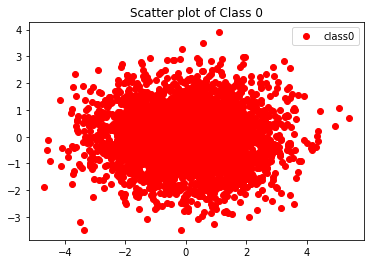

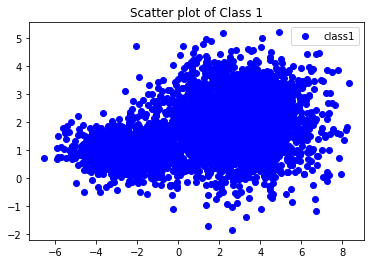

In [4]:
# Plotting the two classes
plt.plot(x_class0,y_class0,'ro',label="class0")
plt.title("Scatter plot of Class 0")
plt.legend()
plt.show()

plt.plot(x_class1,y_class1,'bo',label="class1")
plt.title("Scatter plot of Class 1")
plt.legend()
plt.show()


In [ ]:
# Dividing the generated data into Training,testing and validation in the ratio of 70:20:10 

#Splitting the 2 classes individually to keep the datasets balanced
# splitting_ratio = [0.7,0.2,0.1]

#Splitting Class0 data
trainingC0 = C0[:,0:math.floor(0.7*NS/2)]
testingC0 = C0[:,math.floor(0.7*NS/2):(math.floor(0.7*NS/2)+math.floor(0.2*NS/2))]
validationC0 = C0[:,-(math.floor(0.1*NS/2)):]
# print('The size of Class 0 training set is',np.shape(trainingC0))
# print('The size of Class 0 testing set is',np.shape(testingC0))
# print('The size of Class 0 validation set is',np.shape(validationC0))

# Splitting Class1 data
trainingC1 = C1[:,0:math.floor(0.7*NS/2)]
testingC1 = C1[:,math.floor(0.7*NS/2):(math.floor(0.7*NS/2)+math.floor(0.2*NS/2))]
validationC1 = C1[:,-(math.floor(0.1*NS/2)):]
# print('The size of Class 1 training set is',np.shape(trainingC1))
# print('The size of Class 1 training set is',np.shape(testingC1))
# print('The size of Class 1 training set is',np.shape(validationC1))


In [ ]:
# Combining Class 0 and Class 1 data
training = np.concatenate([trainingC0, trainingC1], axis=1)
testing = np.concatenate([testingC0, testingC1], axis=1)
validation = np.concatenate([validationC0, validationC1], axis=1)
print('The size of entire training set is',np.shape(training))
print('The size of entire testing set is',np.shape(testing))
print('The size of entire validation set is',np.shape(validation))

y_training = np.append(np.zeros(math.floor(0.7*NS/2)), np.ones(math.floor(0.7*NS/2)))
y_test = np.append(np.zeros(math.floor(0.2*NS/2)), np.ones(math.floor(0.2*NS/2)))
y_validation = np.append(np.zeros(math.floor(0.1*NS/2)), np.ones(math.floor(0.1*NS/2)))
# print('y_training',y_training)
print(len(y_training))

In [ ]:
#Shuffling of the combined data
training_shuffled = np.random.permutation(len(y_training))
testing_shuffled = np.random.permutation(len(y_test))
validation_shuffled = np.random.permutation(len(y_validation))
# print('training_shuffled',training_shuffled)

training = training[:,training_shuffled]
test = testing[:,testing_shuffled]
validation = validation[:,validation_shuffled]
# print('training',training)

y_training = y_training[training_shuffled]
y_test = y_test[testing_shuffled]
y_validation = y_validation[validation_shuffled]
# print('y_training_shuffled',y_training)


In [ ]:
#Neural Network
learning_rate = 0.01
steps = int(NS*0.7)
epochs = 25
batch_size = 10

hidden_layer_1 = 10 # number of neurons in first layer
hidden_layer_2 = 10 # number of neurons in second layer
input_size = 2
labels = 1

#input and output layer
X = tf.placeholder("float", [None, input_size])
Y = tf.placeholder("float", [None, labels])

# Weights and Biases
weights = {'h1': tf.Variable(tf.random_normal([input_size, hidden_layer_1])),'h2': tf.Variable(tf.random_normal([hidden_layer_1, hidden_layer_2])),'out': tf.Variable(tf.random_normal([hidden_layer_2, labels]))
}
biases = {'b1': tf.Variable(tf.random_normal([hidden_layer_1])),'b2': tf.Variable(tf.random_normal([hidden_layer_2])),'out': tf.Variable(tf.random_normal([labels]))
}

# Neural Network with 2 layers
def NN(x):
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1']) #l1 = h1*x+b1
    layer_1 = tf.nn.relu(layer_1) #Adding Relu nonlinearity in layer 1
    
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2']) #l2 = h2*l1+b2
    layer_2 = tf.nn.relu(layer_2) #Adding Relu nonlinearity in layer 1
    
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out'] #output = wout*l2+bout
    return out_layer

logits = NN(X)
prediction = tf.nn.sigmoid(logits)
prediction = tf.cast(tf.greater(prediction, 1/2), tf.float32)

# Define loss and optimizer
loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(
    logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# Evaluate model (with test logits, for dropout to be disabled)
correct_pred = tf.equal(prediction, Y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# Initializing variables
init = tf.global_variables_initializer()

In [ ]:
# Start training
with tf.Session() as sess:

    # Run the initializer
    sess.run(init)

    for epoch in range(1, epochs+1):
        for batch in range(0, steps, batch_size):
            batch_x = training[:,batch:batch+batch_size].T
            batch_y = y_training[batch:batch+batch_size].reshape([-1,1])
            
            # Run optimization op (backprop)
            sess.run(train_op, feed_dict={X: batch_x, Y: batch_y})
            
            # Calculate batch loss and accuracy
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: batch_x,
                                                                 Y: batch_y})
            
            
            print("Epoch " + str(epoch) + ", batch: " + str(batch/batch_size + 1) + \
                  ", Minibatch Loss = " + "{:.4f}".format(loss) + \
                  ", Training Accuracy = " + "{:.3f}".format(100*acc))
            

    print("Optimization Finished!")

    # Calculate accuracy for test data
    print("Testing Accuracy:", \
        sess.run(accuracy, feed_dict={X: testing.T,
                                      Y: y_test.reshape([-1,1])}))
    
    print("Validation Accuracy:", \
        sess.run(accuracy, feed_dict={X: validation.T,
                                      Y: y_validation.reshape([-1,1])}))